In [17]:
import pandas as pd
import numpy as np
import warnings

def _check_returns(returns):
    # Check NaNs excluding leading NaNs
    if np.any(np.isnan(returns.mask(returns.ffill().isnull(), 0))):
        warnings.warn(
            "Some returns are NaN. Please check your price data.", UserWarning
        )
    if np.any(np.isinf(returns)):
        warnings.warn(
            "Some returns are infinite. Please check your price data.", UserWarning
        )

def custom_mean_historical_return(returns, compounding=True, frequency=252):
    """
    Calculate annualized mean (daily) historical return from input (daily) asset returns.

    :param returns: percentage returns of the assets, each row is a date, and each column is a ticker/id.
    :type returns: pd.DataFrame
    :param compounding: computes geometric mean returns if True, arithmetic otherwise, optional.
    :type compounding: bool, defaults to True
    :param frequency: number of time periods in a year, defaults to 252 (the number of trading days in a year)
    :type frequency: int, optional
    :return: annualized mean (daily) return for each asset
    :rtype: pd.Series
    """
    _check_returns(returns)
    
    # Convert percentage returns to decimals
    returns = returns / 100
    
    # Replace NaN values with 0 for compounding
    returns = returns.fillna(0)
    
    # Print NaN and Inf values separately for investigation
    nan_values = returns[returns.isna()].index.tolist()
    inf_values = returns[np.isinf(returns)].index.tolist()
    
    if nan_values:
        print(f"Nan Values: {nan_values}")

    if inf_values:
        print(f"Inf Values: {inf_values}")
    
    # Calculate the annualized mean return for each ticker
    if compounding:
        product = (1 + returns).prod()
        geometric_mean = product ** (frequency / returns.count()) - 1
        return geometric_mean
    else:
        return returns.mean() * frequency

# Load data
df = pd.read_excel(r'ETF_Data\data\pivot_table_2018_2023.xlsx')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Calculate annualized mean (daily) return for each ticker
mean_returns = df.apply(custom_mean_historical_return, axis=0)

# Display or use mean_returns as needed
print(mean_returns)


BNO     0.071107
BOTZ    0.031278
CORN    0.042931
GLD     0.075475
HACK    0.114051
IHI     0.109821
KBE    -0.004711
KIE     0.066812
KRE    -0.019106
PALL   -0.000758
PJP     0.028885
PPLT    0.005015
QQQ     0.175192
SKYY    0.114203
SLV     0.052962
SMH     0.237116
SOYB    0.071319
SPY     0.101198
UNG    -0.224955
USO    -0.059248
WEAT   -0.000837
XBI     0.008514
XLF     0.051028
XLV     0.087169
dtype: float64


C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

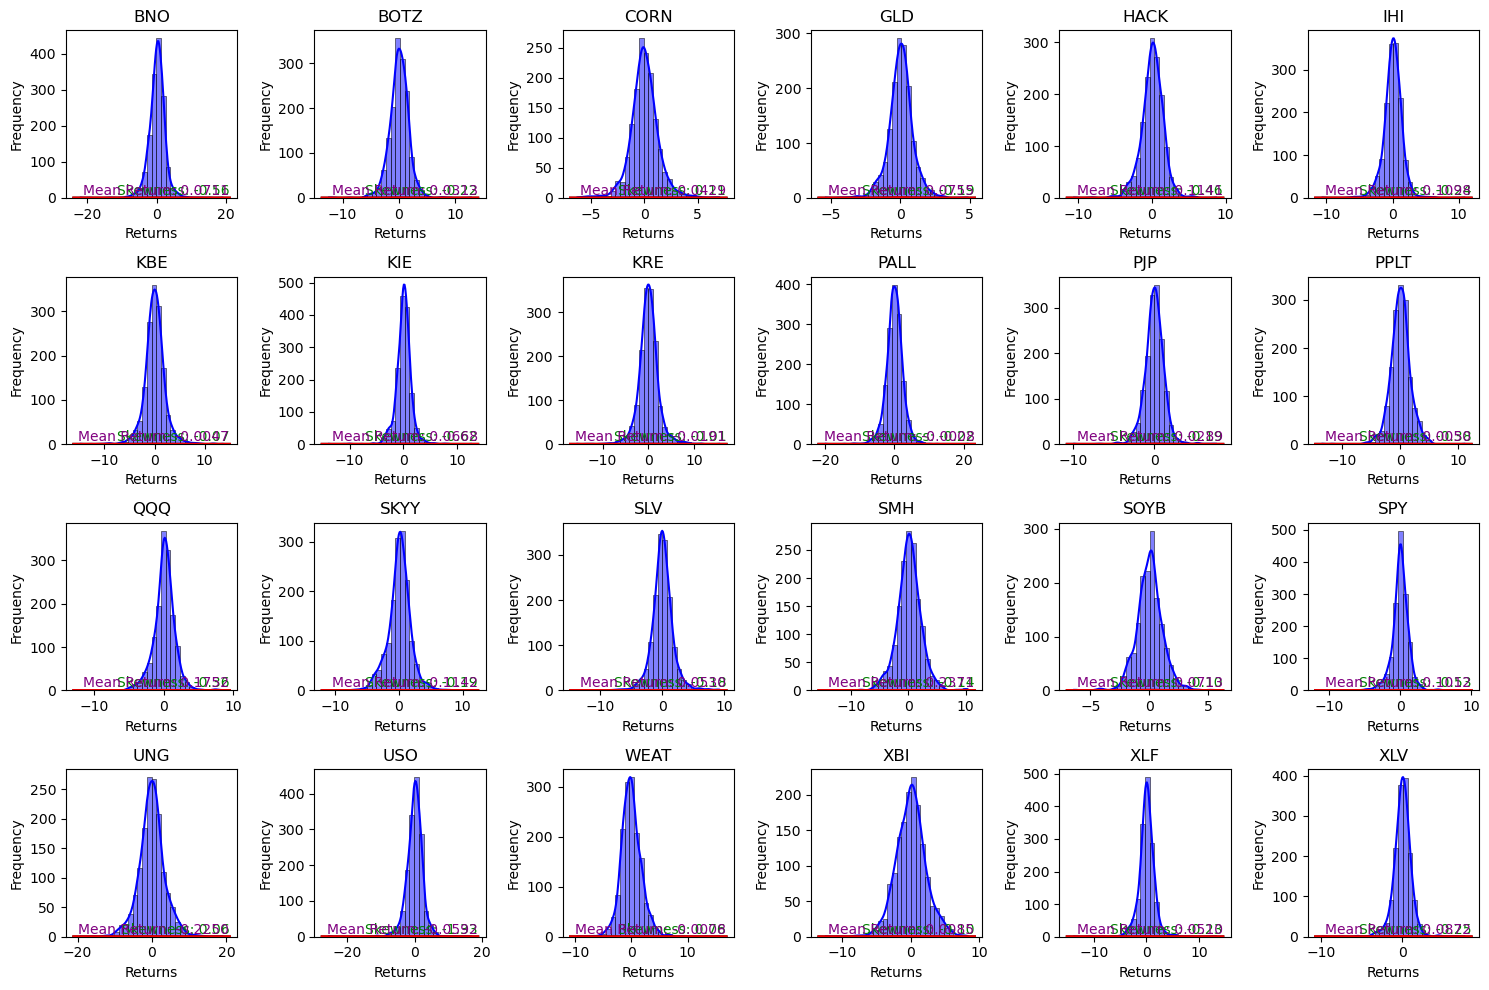

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t, skew

# Assuming prices_all is your DataFrame with tickers as columns and returns as values
# For example:
# Get the list of tickers
tickers = df.columns

# Plot individual histograms for each ticker
plt.figure(figsize=(15, 10))

for ticker in tickers:
    plt.subplot(4, 6, tickers.get_loc(ticker) + 1)  # Adjust the subplot layout as needed
    sns.histplot(df[ticker].dropna(), bins=30, kde=True, color='blue')
    
    plt.title(ticker)
    plt.xlabel('Returns')
    plt.ylabel('Frequency')

    # Fit normal distribution
    mu, std = norm.fit(df[ticker].dropna())
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='Normal Fit')

    # Fit Student's t distribution
    df_fit, loc, scale = t.fit(df[ticker].dropna())  # Use a different variable name for the fit result
    p = t.pdf(x, df_fit, loc, scale)  # Use the new variable name
    plt.plot(x, p, 'r', linewidth=2, label='Student\'s t Fit')

    # Display skewness
    skewness = skew(df[ticker].dropna())
    plt.text(xmax, 0.2, f'Skewness: {skewness:.2f}', verticalalignment='bottom', horizontalalignment='right', color='green', fontsize=10)

    # Display mean returns
    mean_return = mean_returns[ticker]
    plt.text(xmax, 0.15, f'Mean Return: {mean_return:.4f}', verticalalignment='bottom', horizontalalignment='right', color='purple', fontsize=10)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

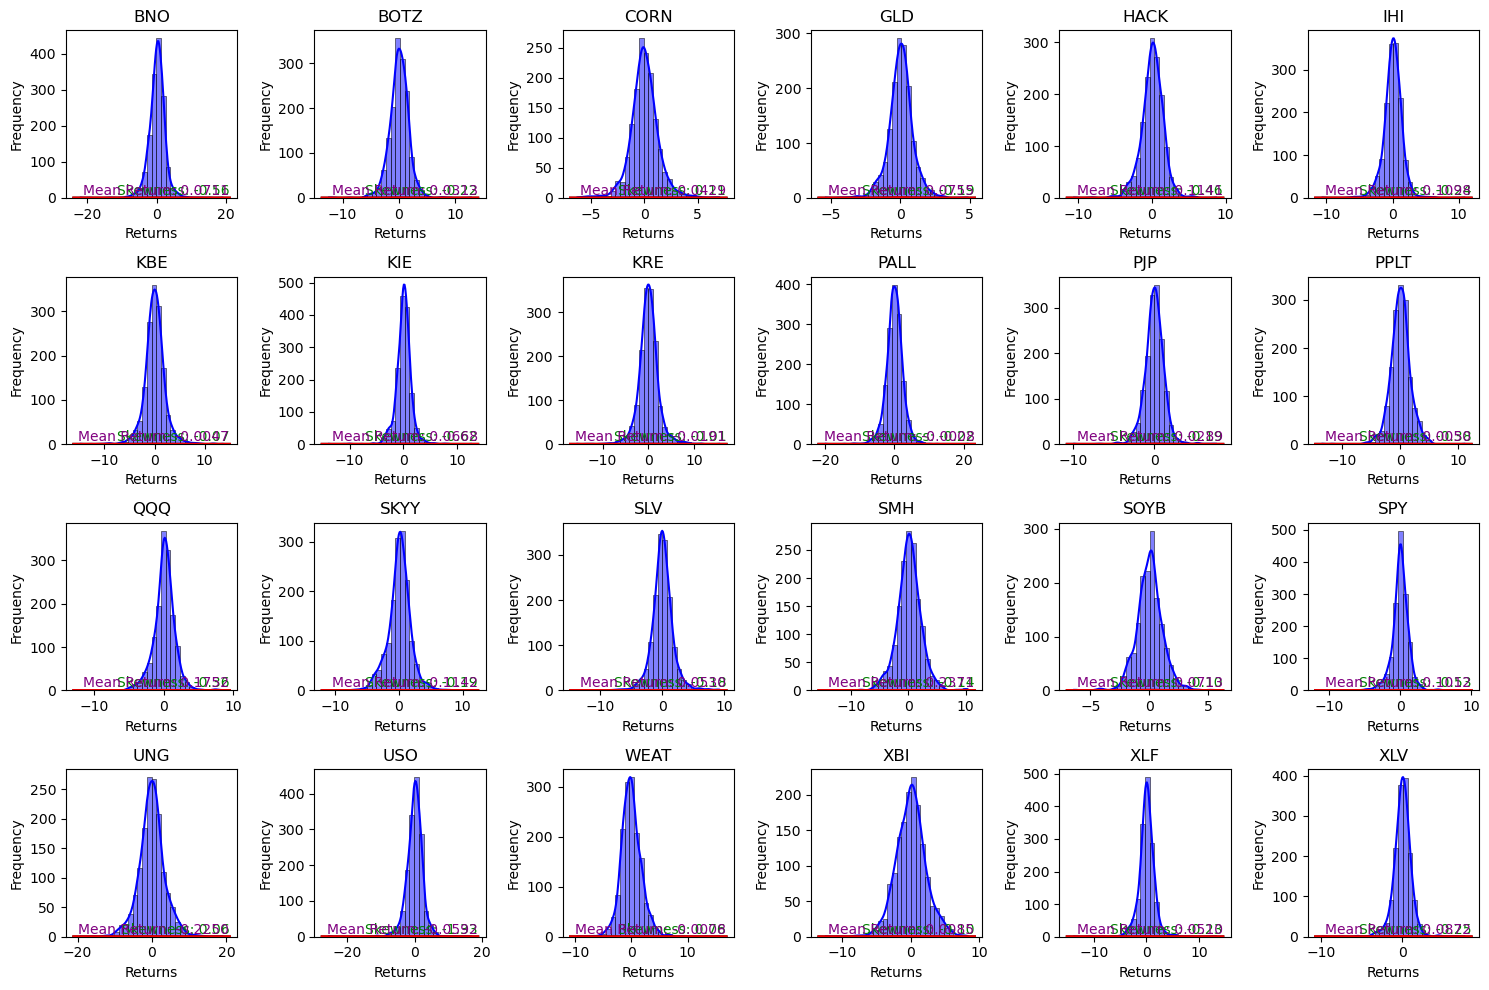

Skewness Values:
{'BNO': -0.5609063660956938, 'BOTZ': -0.220498259935974, 'CORN': 0.10611414485963855, 'GLD': -0.18912122852741342, 'HACK': -0.46036345020597946, 'IHI': -0.23701381535328694, 'KBE': -0.06771928279349934, 'KIE': -0.6235168471770152, 'KRE': -0.006765967433910687, 'PALL': -0.21598056171364108, 'PJP': -0.18897078224079378, 'PPLT': -0.37516189879343936, 'QQQ': -0.35526537604980374, 'SKYY': -0.19042997043448212, 'SLV': -0.18373562981739366, 'SMH': -0.13900453562599863, 'SOYB': -0.10249103633462674, 'SPY': -0.5312079196354444, 'UNG': 0.058749284654282315, 'USO': -1.3296994966782307, 'WEAT': 0.763013056907097, 'XBI': -0.09834860301058132, 'XLF': -0.22840754683283926, 'XLV': -0.24647508227268328}


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t, skew

# Assuming prices_all is your DataFrame with tickers as columns and returns as values
# For example:
# Get the list of tickers
tickers = df.columns

# Create a dictionary to store skewness values
skewness_dict = {}

# Plot individual histograms for each ticker
plt.figure(figsize=(15, 10))

for ticker in tickers:
    plt.subplot(4, 6, tickers.get_loc(ticker) + 1)  # Adjust the subplot layout as needed
    sns.histplot(df[ticker].dropna(), bins=30, kde=True, color='blue')
    
    plt.title(ticker)
    plt.xlabel('Returns')
    plt.ylabel('Frequency')

    # Fit normal distribution
    mu, std = norm.fit(df[ticker].dropna())
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='Normal Fit')

    # Fit Student's t distribution
    df_fit, loc, scale = t.fit(df[ticker].dropna())  # Use a different variable name for the fit result
    p = t.pdf(x, df_fit, loc, scale)  # Use the new variable name
    plt.plot(x, p, 'r', linewidth=2, label='Student\'s t Fit')

    # Display skewness
    skewness = skew(df[ticker].dropna())
    skewness_dict[ticker] = skewness  # Store skewness value in the dictionary
    plt.text(xmax, 0.2, f'Skewness: {skewness:.2f}', verticalalignment='bottom', horizontalalignment='right', color='green', fontsize=10)

    # Display mean returns
    mean_return = mean_returns[ticker]
    plt.text(xmax, 0.15, f'Mean Return: {mean_return:.4f}', verticalalignment='bottom', horizontalalignment='right', color='purple', fontsize=10)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# Display the skewness values as a dictionary
print("Skewness Values:")
print(skewness_dict)